# EXPLORATION03 고양이 수염 스티커 만들기




#### 1. 준비된 이미지 읽기
#### 2. 이미지 색깔 보정처리하기 (BGR -> RGB)
#### 3. 얼굴 검출하고 얼굴의 bounding box 추출
#### 4. 랜드마크 출력
#### 5. 스티커 적용을 위한 위치계산
#### 6. 스티커 적용하고 바운딩 박스와 랜드마크 제거


###   1.  이미지 처리를 위해 opencv와 이미지를 출력하기 위한 matplotlib읽어오기

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("😆😉")

😆😉


### 2. 준비된 이미지 읽기

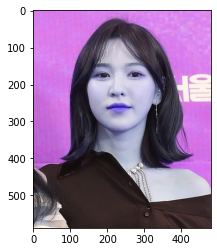

In [3]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.JPG'
img_bgr = cv2.imread(my_image_path)  # -OpenCV로 이미지 읽고
# 원래 이미지 크기로 하지 않으면 나중에 바운딩 박스가 제대로 추출 되지 않음
img_bgr = cv2.resize(img_bgr, (480, 588)) # 480x588의 크기로 resize
img_show = img_bgr.copy()  #출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

### 3. 이미지 색깔 보정처리 해주기

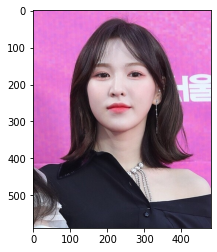

In [4]:
#색깔 보정처리(opencv는 예외적으로 BGR을 사용하기 때문에 보정처리 해줘야함)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### 4. 얼굴 검출 face detection

In [5]:
#dilib을 활용해서 hog detector 선언
import dlib
detector_hog = dlib.get_frontal_face_detector() #detector선언
print("😆😊")

😆😊


In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print("😆😊")

😆😊


rectangles[[(139, 118) (324, 304)]]


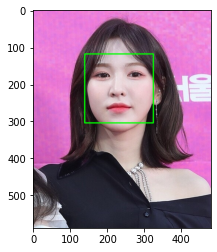

In [7]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 5. 랜드마크 출력

In [8]:
#저장한 lnadmark 모델 불러오기
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [9]:
#RGB 이미지와 dlib.rectangle입력받아 dlib.full_object_detection 반환
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))    

68


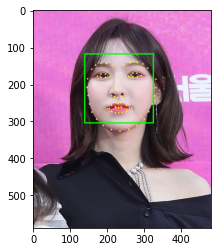

In [10]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 6. 스티커 적용

In [11]:
#스티커를 적용하기 위해 먼저 좌표먼저 확인!
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30]) #코 가운데에 스티커가 위치해야하기 때문에 30번 인덱스 사용 
    x = landmark[30][0] 
    y = landmark[30][1] 
    w = dlib_rect.width()
    h = dlib_rect.width()

    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))  
  

(226, 216)
(x,y) : (226,216)
(w,h) : (186,186)


(186, 186, 3)


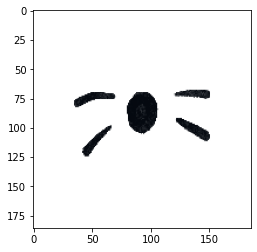

In [12]:
#고양이 수염 이미지를 읽고 윗 단계에서 계산한 크기로 resize
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

print (img_sticker.shape)
plt.imshow(img_sticker )

In [13]:
refined_x = x - w//2             # left
refined_y = y - h//2 + 10       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (133,133)


In [14]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

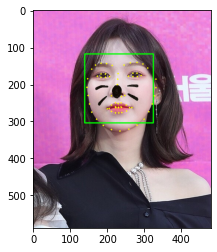

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 바운딩 박스와 랜드마크 제거하기

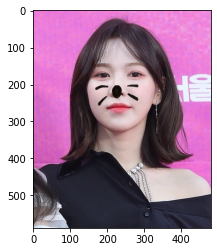

In [16]:
# img_sticker == 0일때는 흰색배경까지 포함이 되는데 img_sticker == 255 으로 하면 스티커모양만 나올 수 있음
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## (1) 거리가 먼 사진

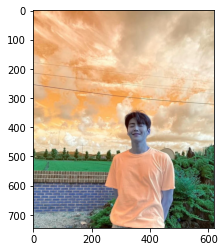

In [17]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image1.jpeg'
img_bgr = cv2.imread(my_image_path)  # -OpenCV로 이미지 읽고
# 원래 이미지 크기로 하지 않으면 나중에 바운딩 박스가 제대로 추출 되지 않음
img_bgr = cv2.resize(img_bgr, (620, 745)) # 620x745의 크기로 resize
img_show = img_bgr.copy()  #출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

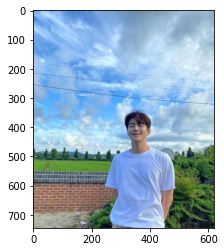

In [18]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [19]:
detector_hog = dlib.get_frontal_face_detector() #detector선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(322, 377) (384, 440)]]


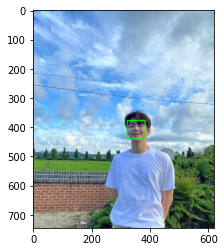

In [20]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [21]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))    

68


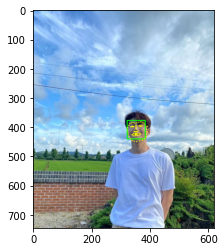

In [22]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [23]:
#스티커를 적용하기 위해 먼저 좌표먼저 확인!
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30]) #코 가운데에 스티커가 위치해야하기 때문에 
    x = landmark[30][0] 
    y = landmark[30][1] 
    w = dlib_rect.width()
    h = dlib_rect.width()

    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))  
  

(352, 406)
(x,y) : (352,406)
(w,h) : (63,63)


(63, 63, 3)


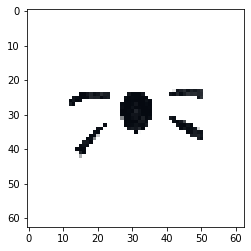

In [24]:
#고양이 수염 이미지를 읽고 윗 단계에서 계산한 크기로 resize
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

print (img_sticker.shape)
plt.imshow(img_sticker )

In [25]:
refined_x = x - w//2             # left
refined_y = y - h//2 + 10       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (321,385)


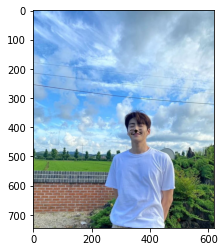

In [26]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### 거리가 먼 이미지여서 적용이 되지 않을 줄 알았는데 적용이 되었다.    
#### 아마도 이목구비가 조금이라도 보이는 거리라서 적용이 된 것 같고
#### 이 사진보다 더 거리가 멀고 얼굴이 거의 안보이게 되면 적용이 안될 것 같다.

## (2) 눈이 한쪽 안보이고 정면이 아닌 사진

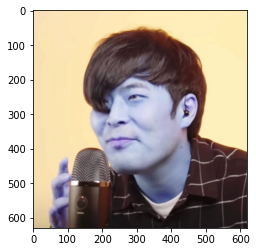

In [27]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image4.jpeg'
img_bgr = cv2.imread(my_image_path)  # -OpenCV로 이미지 읽고
# 원래 이미지 크기로 하지 않으면 나중에 바운딩 박스가 제대로 추출 되지 않음
img_bgr = cv2.resize(img_bgr, (620, 630))
img_show = img_bgr.copy()  #출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

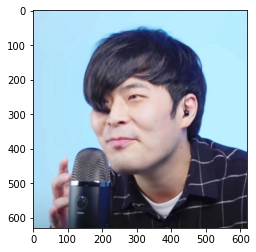

In [28]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [29]:
detector_hog = dlib.get_frontal_face_detector() #detector선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(111, 171) (379, 439)]]


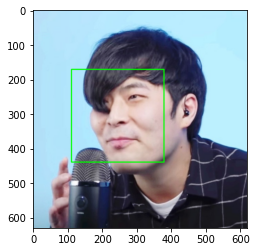

In [30]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [31]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0])) 

68


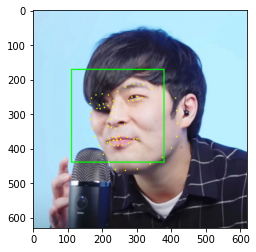

In [32]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [35]:
#스티커를 적용하기 위해 먼저 좌표먼저 확인!
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30]) #코 가운데에 스티커가 위치해야하기 때문에 
    x = landmark[30][0] 
    y = landmark[30][1] 
    w = dlib_rect.width()
    h = dlib_rect.width()

    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))  
  

(225, 314)
(x,y) : (225,314)
(w,h) : (269,269)


(269, 269, 3)


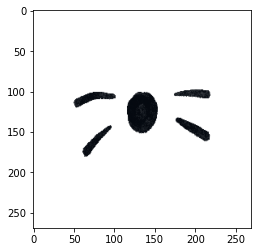

In [37]:
#고양이 수염 이미지를 읽고 윗 단계에서 계산한 크기로 resize
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

print (img_sticker.shape)
plt.imshow(img_sticker )

In [38]:
refined_x = x - w//2 + 10            # left
refined_y = y - h//2 + 10       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (101,190)


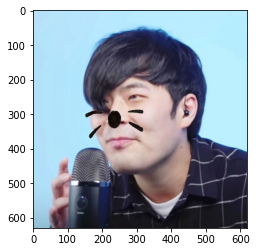

In [39]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## (3) 옆으로 누운 사진

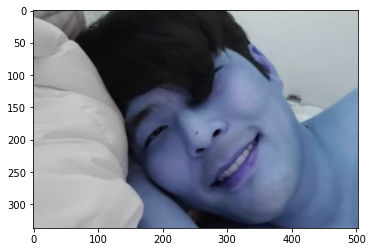

In [40]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image6.jpeg'
img_bgr = cv2.imread(my_image_path)  # -OpenCV로 이미지 읽고
# 원래 이미지 크기로 하지 않으면 나중에 바운딩 박스가 제대로 추출 되지 않음
img_bgr = cv2.resize(img_bgr, (503, 337))
img_show = img_bgr.copy()  #출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

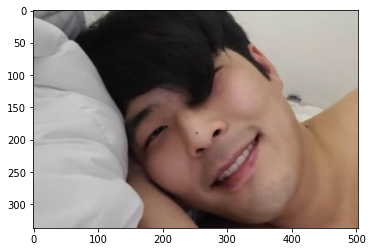

In [41]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [42]:
detector_hog = dlib.get_frontal_face_detector() #detector선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[]


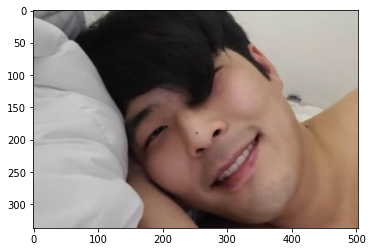

In [43]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 아쉽게도 옆으로 누워있는 사진은 영역 인식을 잘 하지 못함